# Python xarray seminar

## Index

*   [Before start](#start)
*   [Python syntax crash course](#syntax)
*   [Why xarray?](#why)
*   [Dataset and DataArray](#datasets)
*   [Examples](#examples)
    *   [Example 1: Extracting and manipulating time series](#example1)
    *   [Example 2: Grouping, averaging and plotting maps](#example2)
    *   [Example 3: Dealing with ensembles of forecasts](#example3)
*   [Conclusions](#conclusions)

<a id='start'></a>
## Before start


* The goal of this seminar is to demonstrate some of the capabilities of the xarray and pandas python packages.

* To be able to use these packages, only a very superficial knowledge of the python syntax is needed.

* Most of you already know Matlab or R. For you, learning python is going to be easy if you want. Try resources as [Think Python](http://greenteapress.com/wp/think-python/) and [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

* Now we will see a very brief crash course of python syntax for those of you that see it for the first time.

<a id='syntax'></a>
## Python syntax crash course

* In python we always deal with objects. The "=" is the assignation operator, as "<-" in R. 

* Python is designed to be readable and intuitive:

In [1]:
text = "Hello world"
print(text)

Hello world


* There are different types of objects, and the user can define its own kinds of objects, this is, classes.

* The most important built-in classes are String (like the text in the previous example), Tuple, Set, List and Dictionary.

* More interestingly, there are high-level packages, like pandas and xarray, that define custom classes to easily deal with structured data as time series, data frames and netCDFs.

* We will be skipping the introduction to basic python classes, and see an example with the pandas package.

### import statement

We use the import statement to get the pandas package  into our namespace. 

In [2]:
import pandas as pd

* All the pandas functions will be available under the "pd" name. We don't use the full pandas name to keep the names shorter.

* For example the read_csv function, which we can use to read data from comma sepparated ASCII files, is called typing pd.read_csv(arguments). 

* In python, parentheses () are used always to call functions.

* We are going to open the famous [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [3]:
data = pd.read_csv("iris.csv")
data

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
5            5.4         3.9          1.7         0.4     Iris-setosa
6            4.6         3.4          1.4         0.3     Iris-setosa
7            5.0         3.4          1.5         0.2     Iris-setosa
8            4.4         2.9          1.4         0.2     Iris-setosa
9            4.9         3.1          1.5         0.1     Iris-setosa
10           5.4         3.7          1.5         0.2     Iris-setosa
11           4.8         3.4          1.6         0.2     Iris-setosa
12           4.8         3.0          1.4         0.1     Iris-setosa
13           4.3         3.0          1.1         0.1     Iris-setosa
14           5.8         4.0          1.2         0.2     Iris-setosa
15           5.7         4.4          1.5         0.4     Iris-setosa
16           5.4         3.9          1.3         0.4     Iris-setosa
17           5.1         3.5          1.4         0.3     Iris-setosa
18           5.7         3.8          1.7         0.3     Iris-setosa
19           5.1         3.8          1.5         0.3     Iris-setosa
20           5.4         3.4          1.7         0.2     Iris-setosa
21           5.1         3.7          1.5         0.4     Iris-setosa
22           4.6         3.6          1.0         0.2     Iris-setosa
23           5.1         3.3          1.7         0.5     Iris-setosa
24           4.8         3.4          1.9         0.2     Iris-setosa
25           5.0         3.0          1.6         0.2     Iris-setosa
26           5.0         3.4          1.6         0.4     Iris-setosa
27           5.2         3.5          1.5         0.2     Iris-setosa
28           5.2         3.4          1.4         0.2     Iris-setosa
29           4.7         3.2          1.6         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
120          6.9         3.2          5.7         2.3  Iris-virginica
121          5.6         2.8          4.9         2.0  Iris-virginica
122          7.7         2.8          6.7         2.0  Iris-virginica
123          6.3         2.7          4.9         1.8  Iris-virginica
124          6.7         3.3          5.7         2.1  Iris-virginica
125          7.2         3.2          6.0         1.8  Iris-virginica
126          6.2         2.8          4.8         1.8  Iris-virginica
127          6.1         3.0          4.9         1.8  Iris-virginica
128          6.4         2.8          5.6         2.1  Iris-virginica
129          7.2         3.0          5.8         1.6  Iris-virginica
130          7.4         2.8          6.1         1.9  Iris-virginica
131          7.9         3.8          6.4         2.0  Iris-virginica
132          6.4         2.8          5.6         2.2  Iris-virginica
133          6.3         2.8          5.1         1.5  Iris-virginica
134          6.1         2.6          5.6         1.4  Iris-virginica
135          7.7         3.0          6.1         2.3  Iris-virginica
136          6.3         3.4          5.6         2.4  Iris-virginica
137          6.4         3.1          5.5         1.8  Iris-virginica
138          6.0         3.0          4.8         1.8  Iris-virginica
139          6.9         3.1          5.4         2.1  Iris-virginica
140          6.7         3.1          5.6         2.4  Iris-virginica
141          6.9         3.1          5.1         2.3  Iris-virginica
142          5.8         2.7          5.1         1.9  Iris-virginica
143          6.8         3.2          5.9         2.3  Iris-virginica
144          6.7         3.3          5.7         2.5  Iris-virginica
145          6.

### Indexing objects

* The name "data" is now assigned to an object that belongs to the pandas.DataFrame class.

* These objects are _indexable_. This means thay it is possible to subset it using python indexing syntax, with square brackets data[start:stop:step].

* In the case of data frames, this subsets them by rows. Let's see the first ten rows of data.

In [4]:
data[0:10]

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa

### Hashable objects

* Pandas data frames are also _hashable_ objects. This means that they can be subsetted like python Dictionaries. This is used to select columns.

In [5]:
data["SepalLength"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, dtype: float64

### Attributes and methods

* Python objects may contain attributes, which are objects that can be called by typing object_name.attribute_name.

* For example, the "columns" attribute of data frames, is a list of the columns names (not exactly a list but a pandas.Index).

In [6]:
data.columns

Index([u'SepalLength', u'SepalWidth', u'PetalLength', u'PetalWidth', u'Name'], dtype='object')

* Methods are attributes which are functions. The first argument of these functions is implied to be the object itself. They can be interpretated as the object acting on himself and other objects, in the object-oriented programming paradigm

* But you don't have to worry about this. They are just functions. For example, in pandas you can easily compute the mean of each column of the data frame with the mean method.

* Note the parentheses (), needed because we are calling a function, not like in the .columns examples.

* When we call this function, there are no explicit arguments but, as "mean" is a method, the first argument is implicitly the "data" object.

In [7]:
data.mean()

SepalLength    5.843333
SepalWidth     3.054000
PetalLength    3.758667
PetalWidth     1.198667
dtype: float64

* Methods can be chained, so we can do many actions in one line, and keep it readable.

* Pandas plot method is great for easy and fast visualization.

* %matplotlib inline is a "magic command", used to tell ipython to embed the plots in the notebook.

/scratch/python_envs/python2.7/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


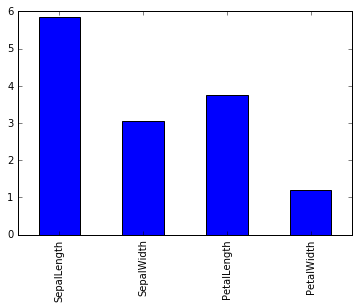

In [8]:
%matplotlib inline
data.mean().plot(kind='bar')

* The open your appetite, here is an example with an advanced visualization library called [seaborn](https://stanford.edu/~mwaskom/software/seaborn/), prepared to work with pandas data frames.

* Note how many lines of code were used to produce this plot.

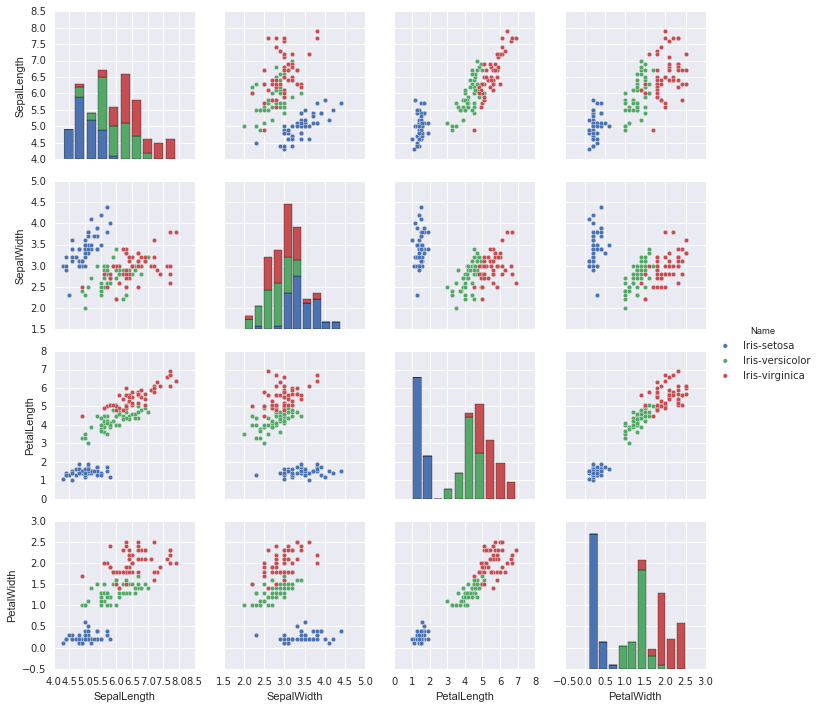

In [9]:
import seaborn as sns
sns.pairplot(data, hue="Name")

<a id='why'></a>
## Why xarray?

* Xarray is a python package designed to manipulate _labeled N-dimensional arrays_. It is very well documented in http://xray.readthedocs.io/en/stable/.

* An "unlabeled" array is simply a n-dimensional matrix of numbers. In python, the [numpy](http://www.numpy.org/) package is the way to deal with these arrays, defining, subsetting, and performing all kind of arithmetical operations. 

* Together with the [matplotlib](http://matplotlib.org/) package for plotting, numpy provides a similar environment to matlab. [scipy](https://www.scipy.org/), [statsmodels](http://statsmodels.sourceforge.net/), [scikit-learn](http://scikit-learn.org/stable/) and [pandas](http://pandas.pydata.org/) are also the essential packages for scientific programming with python. They will not be part of this seminar, except pandas.

* The following is an example of a 1D _unlabeled_ array.

In [10]:
import numpy as np

array1d = np.random.normal(size=365) # Define a random 1D array with 365 numbers

* We can subset it by using the python indexing syntax, which is not very different to those used by matlab, R or IDL.

In [11]:
array1d[10:20]

array([ 1.00022171,  0.11722803, -1.90668339,  1.13775088,  2.02045995,
       -0.08039749,  0.5807175 , -0.22269263,  0.59487397,  0.63681616])

* The pandas package provides an interface for dealing with 1D and 2D labeled arrays, named Series and DataFrames.

* Series are 1D arrays (i.e. vectors) with an index, which can be, for example, a list of times:

In [12]:
times = pd.date_range("2001-01-01", "2001-12-31", freq="D") # Defines a 365 dates list
time_series = pd.Series(array1d, index=times) # Defines the pandas.Series object
time_series

2001-01-01    3.343761
2001-01-02    1.217277
2001-01-03    0.141928
2001-01-04    0.185559
2001-01-05   -1.103481
2001-01-06    0.060170
2001-01-07   -0.608201
2001-01-08    0.454098
2001-01-09   -0.558229
2001-01-10   -1.531346
2001-01-11    1.000222
2001-01-12    0.117228
2001-01-13   -1.906683
2001-01-14    1.137751
2001-01-15    2.020460
2001-01-16   -0.080397
2001-01-17    0.580718
2001-01-18   -0.222693
2001-01-19    0.594874
2001-01-20    0.636816
2001-01-21    0.177022
2001-01-22    0.610783
2001-01-23    0.374424
2001-01-24   -0.477728
2001-01-25   -0.481080
2001-01-26   -0.958895
2001-01-27    0.660522
2001-01-28    0.681850
2001-01-29   -0.540039
2001-01-30   -0.043397
                ...   
2001-12-02    0.693111
2001-12-03    0.067234
2001-12-04   -0.385553
2001-12-05   -0.995801
2001-12-06    0.475032
2001-12-07    0.281666
2001-12-08    0.571524
2001-12-09   -1.926343
2001-12-10    0.558822
2001-12-11   -0.804413
2001-12-12    0.050581
2001-12-13    1.121038
2001-12-14 

* This time series is a _labeled_ array, and the date list we have defined are the labels.
* This means that it can be indexed using the dates directly, which is handy. We do this with the "loc" attribute. Suppose we want to select the spring:

In [13]:
time_series.loc["2001-03-01":"2001-05-31"]

2001-03-01    1.398323
2001-03-02   -1.190053
2001-03-03    0.349219
2001-03-04    1.033881
2001-03-05    0.767886
2001-03-06   -1.819828
2001-03-07   -1.576297
2001-03-08    0.092542
2001-03-09    0.937956
2001-03-10   -0.736763
2001-03-11   -0.616264
2001-03-12    0.041831
2001-03-13   -0.934485
2001-03-14   -0.264704
2001-03-15   -0.989144
2001-03-16    0.082985
2001-03-17    0.379253
2001-03-18    0.595663
2001-03-19   -0.772515
2001-03-20   -1.857160
2001-03-21   -1.168810
2001-03-22   -0.392759
2001-03-23    0.032113
2001-03-24    0.387125
2001-03-25   -2.331421
2001-03-26   -1.060874
2001-03-27   -0.075963
2001-03-28    1.010483
2001-03-29   -0.335488
2001-03-30   -0.983218
                ...   
2001-05-02    0.779538
2001-05-03    1.215977
2001-05-04   -0.620293
2001-05-05   -0.700033
2001-05-06    0.216107
2001-05-07   -1.996419
2001-05-08    1.005130
2001-05-09    2.144721
2001-05-10    0.671188
2001-05-11    1.058983
2001-05-12   -1.524401
2001-05-13    1.158835
2001-05-14 

* We can directly use the plot method to see what we selected. 

* pandas also is able to label the x axis with the dates appropiatedly formatted automatically.

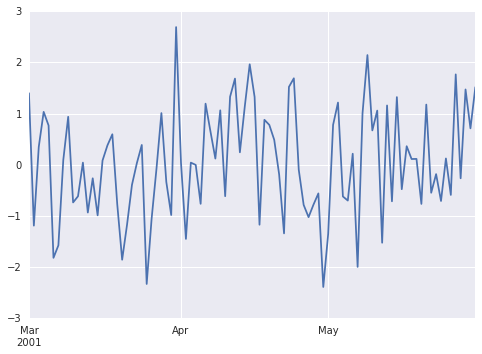

In [14]:
time_series.loc["2001-03-01":"2001-05-31"].plot()

* In order to do this with the standard indexing syntax, we would need to know which are the index numbers for the first day of March and the last day of May. 

* We can still use this syntax with the "iloc" attribute. But this is not intuitive and error prone!

In [15]:
time_series.iloc[59:151]

2001-03-01    1.398323
2001-03-02   -1.190053
2001-03-03    0.349219
2001-03-04    1.033881
2001-03-05    0.767886
2001-03-06   -1.819828
2001-03-07   -1.576297
2001-03-08    0.092542
2001-03-09    0.937956
2001-03-10   -0.736763
2001-03-11   -0.616264
2001-03-12    0.041831
2001-03-13   -0.934485
2001-03-14   -0.264704
2001-03-15   -0.989144
2001-03-16    0.082985
2001-03-17    0.379253
2001-03-18    0.595663
2001-03-19   -0.772515
2001-03-20   -1.857160
2001-03-21   -1.168810
2001-03-22   -0.392759
2001-03-23    0.032113
2001-03-24    0.387125
2001-03-25   -2.331421
2001-03-26   -1.060874
2001-03-27   -0.075963
2001-03-28    1.010483
2001-03-29   -0.335488
2001-03-30   -0.983218
                ...   
2001-05-02    0.779538
2001-05-03    1.215977
2001-05-04   -0.620293
2001-05-05   -0.700033
2001-05-06    0.216107
2001-05-07   -1.996419
2001-05-08    1.005130
2001-05-09    2.144721
2001-05-10    0.671188
2001-05-11    1.058983
2001-05-12   -1.524401
2001-05-13    1.158835
2001-05-14 

* Pandas is an extremely powerful and useful package, however, it is not able to deal with labeled arrays of more than two dimensions, and gridded climate data usually has at least 3: time, latitude and longitude.

* xarray is devoted exactly to this, labeled N-dimensional arrays. As they say in their web

>Our goal is to provide a pandas-like and pandas-compatible toolkit for analytics on multidimensional arrays, rather than the tabular data for which pandas excels. Our approach adopts the Common Data Model for self- describing scientific data in widespread use in the Earth sciences: xarray.Dataset is an in-memory representation of a netCDF file.

* xarray can directly read netCDFs, modify, combine, or concatenate them and then write the result to a new netCDF directly with "to_netcdf" method or either plot it with a "plot" method!!

<a id='datasets'></a>
## Dataset and DataArray

* These are the basic classes of xarray.

* xarray.DataArray objects are the labeled arrays themselves, while xarray.Dataset objects are essentially collections (dictionaries) of named DataArrays.

* xarray supports attributes, so Datasets are full a in-memory representation of netCDF files.

* For example, lets play with this netCDF. It contains global gridded temperatures from the Berkeley Earth dataset, from the year 1750.

In [16]:
!ncdump -h BEST_tasmean.nc # Prepending ! we can call the shell from ipython

netcdf BEST_tasmean {
dimensions:
	lon = 360 ;
	lat = 180 ;
	time = UNLIMITED ; // (3192 currently)
variables:
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
	float tasmean(time, lat, lon) ;
		tasmean:_FillValue = -9999.f ;
		tasmean:units = "degree C" ;
		tasmean:long_name = "Mean surface air temperature" ;
		tasmean:standard_name = "air_temperature" ;
	double time(time) ;
		time:units = "days since 1950-01-01 00:00:00" ;
}


We can open it easily with xarray by using the open_dataset function:

In [17]:
import xarray as xr

tasmean_file = "BEST_tasmean.nc"
dataset = xr.open_dataset(tasmean_file)
dataset

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 3192)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * time     (time) datetime64[ns] 1750-01-01 1750-02-01 1750-03-01 ...
Data variables:
    tasmean  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

* At this point, xarray did not load into the memory of the computer the data in the netCDF, it just parsed the structure. This philosophy is called "lazy loading". 

* The netCDF is opened as a xarray.Dataset object with one data variable and three coordinates. 

* We can get the data variable as a xarray.DataArray object as an attribute with the variable name.

In [18]:
dataset.tasmean

<xarray.DataArray 'tasmean' (time: 3192, lat: 180, lon: 360)>
[206841600 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * time     (time) datetime64[ns] 1750-01-01 1750-02-01 1750-03-01 ...
Attributes:
    units: degree C
    long_name: Mean surface air temperature
    standard_name: air_temperature

* We can easily add new variables to a dataset. Let's transform the temperaturee to kelvin degrees and add it as a new variable:

In [19]:
dataset["tasmean_K"] = dataset.tasmean + 273.15
dataset

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 3192)
Coordinates:
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * time       (time) datetime64[ns] 1750-01-01 1750-02-01 1750-03-01 ...
Data variables:
    tasmean    (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    tasmean_K  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

* We can add an attribute to tasmean_K easily, for example the units, using the dictionary syntax.

* After this, saving to a netCDF is trivial, with the "to_netcdf" method.

In [20]:
dataset.tasmean_K.attrs["units"] = "degrees_kelvin"
dataset.to_netcdf("dataset.nc")
!ncdump -h dataset.nc


netcdf dataset {
dimensions:
	lon = 360 ;
	lat = 180 ;
	time = 3192 ;
variables:
	float lon(lon) ;
		string lon:standard_name = "longitude" ;
		string lon:long_name = "Longitude" ;
		string lon:units = "degrees_east" ;
	float lat(lat) ;
		string lat:standard_name = "latitude" ;
		string lat:long_name = "Latitude" ;
		string lat:units = "degrees_north" ;
	float tasmean(time, lat, lon) ;
		tasmean:_FillValue = -9999.f ;
		string tasmean:units = "degree C" ;
		string tasmean:long_name = "Mean surface air temperature" ;
		string tasmean:standard_name = "air_temperature" ;
	double time(time) ;
		string time:units = "days since 1950-01-01" ;
		time:calendar = "proleptic_gregorian" ;
	double tasmean_K(time, lat, lon) ;
		tasmean_K:units = "degrees_kelvin" ;
}


<a id='examples'></a>
## Examples:

* The following is a non-exahustive list of examples about how xarray makes your life easier when dealing with netCDFs. 

* I know by experience that programming these tasks with lower level packages (in python we woudl use scipy.io.netcdf or netCDF4, numpy and datetime), requires way more lines and is way more prone to errors.

<a id='example1'></a>
### Example 1: Extracting and manipulating time series from a netCDF

* Suppose we want to know how the temperature evolved in a given location during the past decades. We know the longitude and latitude of the location. 

* With xarray we can extract this time series almost immediatly by using the "sel" method.

In [21]:
lon_st = -5.3795 # Location of the Grazalema station of CLIMADAT
lat_st = 36.6956

tasmean_st = dataset.tasmean.sel(lon=lon_st, lat=lat_st, method='nearest')
tasmean_st

<xarray.DataArray 'tasmean' (time: 3192)>
array([         nan,          nan,          nan, ...,  19.7899437 ,
        15.44524574,  13.49675369])
Coordinates:
    lon      float32 -5.5
    lat      float32 36.5
  * time     (time) datetime64[ns] 1750-01-01 1750-02-01 1750-03-01 ...
Attributes:
    units: degree C
    long_name: Mean surface air temperature
    standard_name: air_temperature

* With the method="nearest" we are telling xarray to automatically search for the gridpoint nearest to the point given. In this case, we can see that it is (-5.5, 36.5). 

* xarray automatically decoded the time coordinate

* Now lets plot the series.

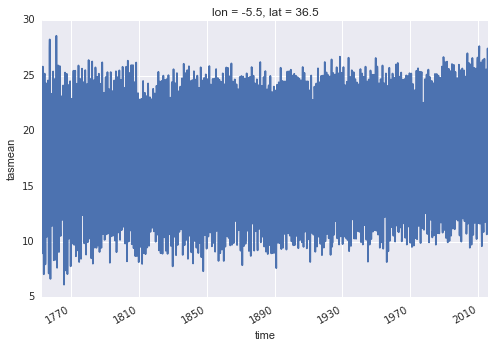

In [22]:
tasmean_st.plot()

Now, that was easy! But the plot is noisy. Let's say we want the data averaged by year. We can use the resample method.

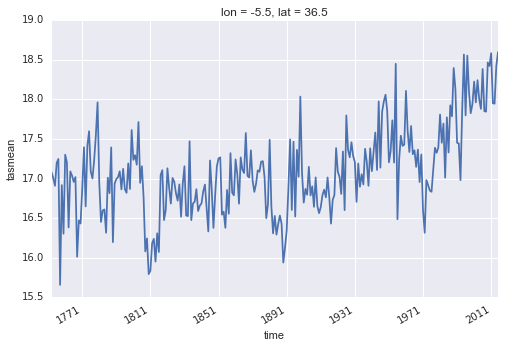

In [23]:
tasmean_st_yearly = tasmean_st.resample(dim='time', freq='AS', how='mean')
tasmean_st_yearly.plot()

* We have seen how to select a lon, lat point. But what if we cant to select an interval? 

* To subset interval from a labeled axis, we can use the slice(start, stop, step) objects of python. Here we use it to get the last 115 years:

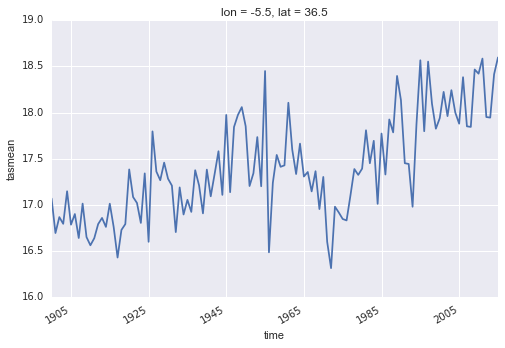

In [24]:
tasmean_lastc = tasmean_st_yearly.sel(time=slice("1900-01-01", "2015-01-01"))
tasmean_lastc.plot()

<a id='example2'></a>
## Example 2: Grouping, averaging, and plotting maps

Task: Plot the 1971-2000 temperature climatology over the Iberian Peninsula. We can do this easily with the sel and the mean methods.

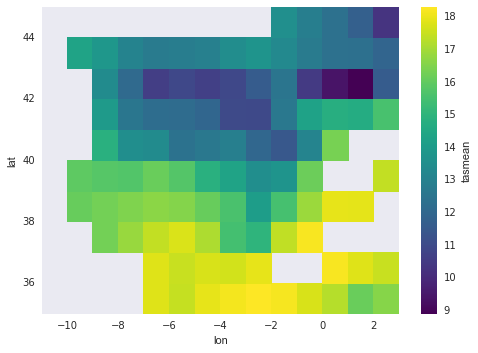

In [25]:
# Select the box
tasmean_ip = dataset.tasmean.sel(lon=slice(-11, 3), lat=slice(35, 45))
# Select the time period 
tasmean_ip_bp = tasmean_ip.sel(time=slice("1971-01-01", "2000-12-31"))
# Compute the mean along the time axis
tasmean_ip_clim = tasmean_ip_bp.mean(dim="time")
# Plot!
tasmean_ip_clim.plot()

* We get axis and colorbar labels automatically, but no coastline. 

* In order to plot the coastline, we need to use the [cartopy](http://scitools.org.uk/cartopy/) package. It can be difficult to install... try with conda install -c scitools cartopy.

* Appart from cartopy, the [basemap](http://matplotlib.org/basemap/) package can also be used to plot maps. It is a good package,  but it is not integrated with xarray as cartopy.

* We need to import pyplot from matplotlib as well.

/scratch/python_envs/python2.7/local/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


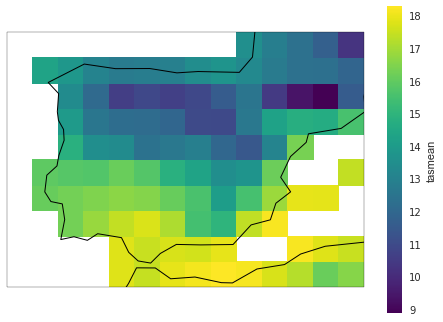

In [26]:
import cartopy.crs as crs
from matplotlib import pyplot as plt

# Define an axes object with a projection
ax = plt.axes(projection=crs.PlateCarree())
# Plot the coastline
ax.coastlines(lw=1) 
# Plot the mesh
tasmean_ip_clim.plot()

* Now lets say that we want to see the anomaly of the year 2010 respect to this baseline.

* Arrays with different dimensions are automatically aligned when doing arithmetics, taking into account dimension names.


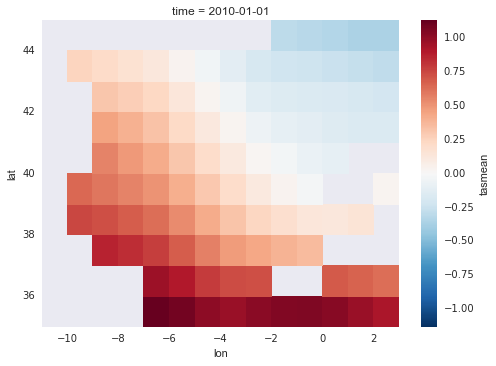

In [27]:
# Aggregate by years
tasmean_ip_yearly = tasmean_ip.resample(dim='time', freq='AS', how='mean')
# Select the year 2010
tasmean_ip_2010 = tasmean_ip_yearly.sel(time="2010-01-01")
# Compute the anomaly
tasmean_ip_2010_anom = tasmean_ip_2010 - tasmean_ip_clim
# Plot!
tasmean_ip_2010_anom.plot()

* Note that the colorbar was changed to a diverging scheme automatically.

* Now suppose we want to plot the climatology for the four seasons sepparatedly. We can do this using groupby. 

* This method lets us divide a dataset into groups and then apply a function over them.

* In order to do group our dataset by seasons, we need a vector with the season of each date. In xarray there is a way to get this fast:

In [28]:
tasmean_ip["time.season"]

<xarray.DataArray 'season' (time: 3192)>
array(['DJF', 'DJF', 'MAM', ..., 'SON', 'SON', 'DJF'], 
      dtype='|S3')
Coordinates:
  * time     (time) datetime64[ns] 1750-01-01 1750-02-01 1750-03-01 ...

So we can use this feature to group the data by seasons and average each group.

In [29]:
dates_seasons = tasmean_ip["time.season"]
tasmean_ip_seas_clim = tasmean_ip.groupby(dates_seasons).mean(dim='time')

Now, the keyword arguments "col" and "col_wrap" can be used to plot many maps at the same time, along a dimension:

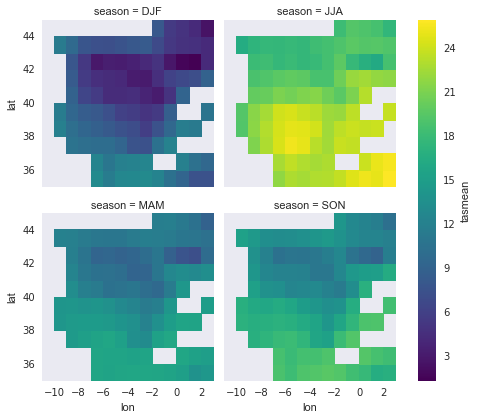

In [30]:
tasmean_ip_seas_clim.plot(col='season', col_wrap=2)


<a id='example3'></a>
## Example 3: Dealing with ensembles of forecasts

* One aspect in which xarray excels is when our data has many dimensions. 

* In our last example we had three dimensions but a typical ensemble has four, time, ensemble member, latitude and longitude.

* In this example we are going to open a temperature forecast from the ECMWF sub-seasonal ensemble, with 10 members, started the July 30th of 2003.

In [31]:
ds = xr.open_dataset("tas_ens_20030730.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 82, lon: 148, member: 10, time: 93)
Coordinates:
  * lon      (lon) float64 -35.25 -34.5 -33.75 -33.0 -32.25 -31.5 -30.75 ...
  * lat      (lat) float64 80.25 79.5 78.75 78.0 77.25 76.5 75.75 75.0 74.25 ...
  * time     (time) datetime64[ns] 2003-07-30 2003-07-30T12:00:00 2003-07-31 ...
  * member   (member) int64 1 2 3 4 5 6 7 8 9 10
Data variables:
    tas      (member, time, lat, lon) float32 270.661 270.848 271.102 ...
Attributes:
    CDI: Climate Data Interface version 1.6.1 (http://code.zmaw.de/projects/cdi)
    Conventions: CF-1.4
    history: Tue Oct 06 15:02:05 2015: cdo -f nc -t ecmwf copy ./tmp/tas_ens_20030730_1.grb ./tmp/tas_ens_20030730_1.nc
    institution: European Centre for Medium-Range Weather Forecasts
    CDO: Climate Data Operators version 1.6.1 (http://code.zmaw.de/projects/cdo)

* We are going to plot the forecast fro the august 3rd 12UTC.

In [32]:
tas_0803 = ds.tas.sel(time="2003-08-03T12:00")
tas_0803

<xarray.DataArray 'tas' (member: 10, lat: 82, lon: 148)>
[121360 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -35.25 -34.5 -33.75 -33.0 -32.25 -31.5 -30.75 ...
  * lat      (lat) float64 80.25 79.5 78.75 78.0 77.25 76.5 75.75 75.0 74.25 ...
    time     datetime64[ns] 2003-08-03T12:00:00
  * member   (member) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    long_name: 2 metre temperature
    units: K
    code: 167
    table: 128

We can easily plot the ensemble mean:

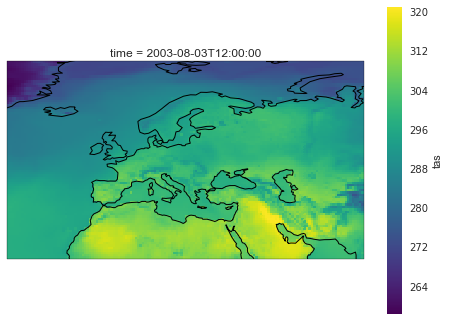

In [42]:
ax = plt.axes(projection=crs.PlateCarree())
ax.coastlines(lw=1)
tas_0803.mean(dim="member").plot()

We can plot the ensemble spread, using the standard deviation, to see the places with more ensemble spread:

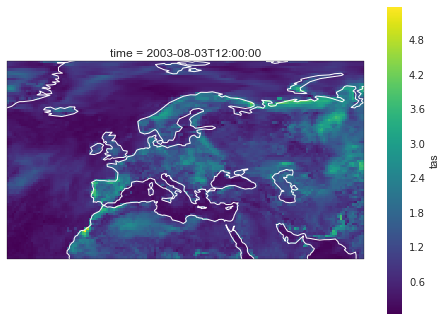

In [41]:
ax = plt.axes(projection=crs.PlateCarree())
ax.coastlines(color="white", lw=1)
tas_0803.std(dim="member").plot()

We can also plot all the ensemble members, but the coastline here doesn't work.

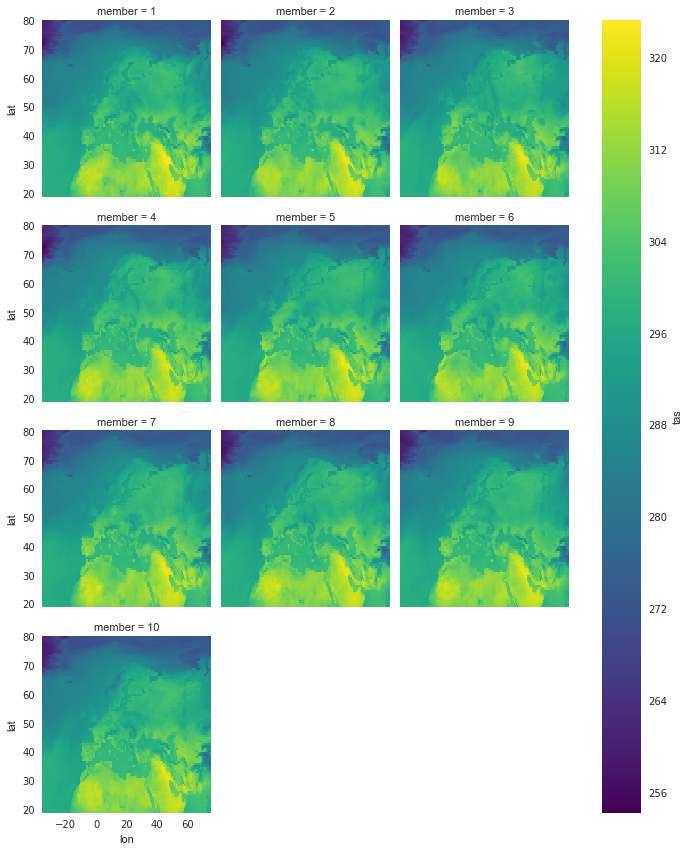

In [49]:
tas_0803.plot(col="member", col_wrap=3)

Finally, we can plot the forecast for Grazalema.

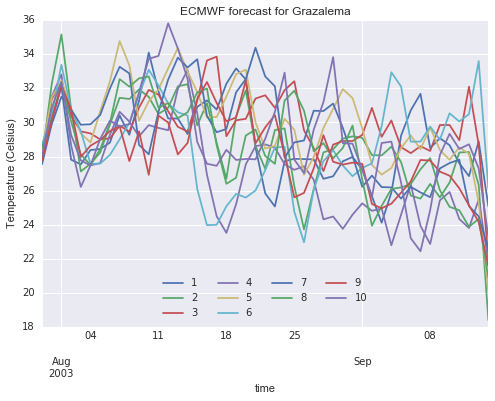

In [63]:
lon_st = -5.3795 # Location of the Grazalema station of CLIMADAT
lat_st = 36.6956

# Read the data
tas_graz = ds.tas.sel(lon=lon_st, lat=lat_st, method='nearest') 
# Convert from 12-hourly freq to daily.
tas_graz_daily = tas_graz.resample(dim="time", freq="D", how="mean")
# Convert to celsius
tas_graz_daily = tas_graz_daily - 273.15
# Convert to pandas.DataFrame, transpose and plot
tas_graz_daily.to_pandas().T.plot(legend=False)
# Improve the plot
plt.legend(ncol=4, loc="lower center")
plt.ylabel("Temperature (Celsius)")
plt.title("ECMWF forecast for Grazalema")

We can see how the ensemble members de-correlate as the forecast time increases.

<a id='conclusions'></a>
## Conclusions

* We saw how xarray can be used to solve typical problems in climate data analysis in an elegant way.

* Indexing arrays based on labels instead of positions makes the code more readable and is less error-prone.

* Dealing with dates, months, seasons, etc, is greatly simplified respect to lower-level libraries as netCDF4.

* It only requires a very superficial knowledge of python.

* It is integrated with pandas and with plotting libraries (matplotlib, cartopy) to easily produce professional quality figures.

* It is very well integrated with netCDF Input/Output as it uses the same data model.

* It is open source (forget about paying licenses).

* R functions and packages can be called from python with the [rpy2 package](http://rpy2.readthedocs.io/en/version_2.7.x/)

## There is even more

* xarray can be used to remotely access OpenDAP datasets, subset them and download only the data you need.

* It supports opening datasets scattered in a collection of files, and concatenating datasets over existing or new dimensions.

* It can deal with large data that does not fit in the RAM memory of the computer, by using the [dask](http://dask.pydata.org/en/latest/) package.

* It is under active development, more features coming https://github.com/pydata/xarray